# Oral Temperature Prediction with Machine Learning
Sara Sarafimova

A regression problem

In [1]:
#To access files and folders
import os
#Data analysis and manipulation library
import pandas as pd
#Math operations for multi-dimensional arrays and matrices
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration

In [2]:
# Raw, unprocessed dataset
df = pd.read_csv("Data.csv")
df

,SubjectID,Date,Round,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,...,T_FHLC,T_FHBC,T_FHTC,T_FH_Max,T_FHC_Max,T_Max,T_OR,T_OR_Max,aveOralF,aveOralM
0,161117-1,16-11-17,1,Male,41-50,White,24.0,28.0,0.8,NaN,...,33.22,33.27,32.74,34.47,33.86,35.36,35.19,35.20,36.85,36.59
1,161117-2,16-11-17,1,Female,31-40,Black or African-American,24.0,26.0,0.8,NaN,...,33.39,33.54,33.72,34.51,34.51,34.79,34.50,34.52,37.00,37.19
2,161117-3,16-11-17,1,Female,21-30,White,24.0,26.0,0.8,NaN,...,33.93,34.82,34.82,35.32,35.12,35.70,35.57,35.59,37.20,37.34
3,161117-4,16-11-17,1,Female,21-30,Black or African-American,24.0,27.0,0.8,NaN,...,34.51,34.28,35.17,35.71,35.47,35.71,34.74,34.76,36.85,37.09
4,161117-5,16-11-17,1,Male,18-20,White,24.0,27.0,0.8,NaN,...,34.15,34.58,35.04,35.31,35.21,35.55,34.94,35.00,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,180425-05,18-04-25,4,Female,21-25,Asian,25.7,50.8,0.6,0.0,...,35.63,35.26,35.30,35.97,35.85,36.68,36.67,36.68,36.95,36.99
4076,180425-06,18-04-25,4,Female,21-25,White,25.7,50.8,0.6,0.0,...,35.17,35.17,34.98,35.60,35.60,36.36,36.22,36.32,37.25,37.19
4077,180502-01,18-05-02,4,Female,18-20,Black or African-American,28.0,24.3,0.6,0.0,...,35.37,35.54,35.72,36.58,35.93,36.78,36.76,36.78,37.35,37.59
4078,180507-01,18-05-07,4,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.15,37.29


In [3]:
df.shape

(4080, 39)

In [4]:
# Statistics of the dataset
round(df.describe(),2)

,Round,T_atm,Humidity,Distance,Cosmetics,T_offset,Max1R13,Max1L13,aveAllR13,aveAllL13,...,T_FHLC,T_FHBC,T_FHTC,T_FH_Max,T_FHC_Max,T_Max,T_OR,T_OR_Max,aveOralF,aveOralM
count,4080.00,4080.00,4080.00,4072.00,3964.00,4013.00,4017.00,4017.00,4017.00,4017.00,...,4013.00,4013.00,4013.00,4013.00,4013.00,4013.00,4013.00,4013.00,4080.00,4080.00
mean,2.50,24.12,28.72,0.73,0.32,0.97,35.60,35.61,34.89,35.01,...,34.57,34.49,34.58,35.42,35.09,36.09,35.81,35.84,36.98,37.03
std,1.12,1.34,13.07,2.46,0.47,0.38,0.59,0.57,0.78,0.69,...,0.72,0.69,0.82,0.54,0.60,0.60,0.77,0.76,0.39,0.51
min,1.00,20.20,9.90,0.54,0.00,-0.76,33.35,30.84,29.95,30.28,...,29.00,30.26,27.70,33.08,31.63,33.85,32.18,32.18,35.75,35.54
25%,1.75,23.40,17.60,0.60,0.00,0.77,35.24,35.28,34.47,34.62,...,34.18,34.10,34.23,35.12,34.74,35.68,35.33,35.36,36.80,36.78
50%,2.50,24.00,26.30,0.62,0.00,0.94,35.55,35.57,34.94,35.03,...,34.62,34.52,34.67,35.41,35.11,36.00,35.77,35.80,36.90,36.94
75%,3.25,24.70,36.20,0.70,1.00,1.14,35.88,35.89,35.33,35.39,...,35.00,34.89,35.05,35.70,35.42,36.41,36.29,36.33,37.10,37.14
max,4.00,29.10,61.20,79.00,1.00,3.58,38.54,38.16,37.74,37.78,...,37.36,37.29,37.45,38.05,37.85,39.68,39.63,39.68,39.60,40.34


In [5]:
print(f"Number of unique subjects: {len(df['SubjectID'].unique())}")

Number of unique subjects: 1020


# 2. Data Preprocessing

### 2.1 Handling Missing Values

In [6]:
# Checking for missing values
missing_values = df.isna().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
SubjectID       0
Date            0
Round           0
Gender          0
Age             0
Ethnicity       0
T_atm           0
Humidity        0
Distance        8
Cosmetics     116
T_offset       67
Max1R13        63
Max1L13        63
aveAllR13      63
aveAllL13      63
T_RC           67
T_RC_Dry       67
T_RC_Wet       67
T_RC_Max       67
T_LC           67
T_LC_Dry       67
T_LC_Wet       67
T_LC_Max       67
RCC            67
LCC            67
canthiMax      67
canthi4Max     67
T_FHCC         67
T_FHRC         67
T_FHLC         67
T_FHBC         67
T_FHTC         67
T_FH_Max       67
T_FHC_Max      67
T_Max          67
T_OR           67
T_OR_Max       67
aveOralF        0
aveOralM        0
dtype: int64


In [7]:
# Handling missing values
# After analyzing the dataset, the column Cosmetics will be filled with 0, 
# and the other columns with missing values will be filled with the mean
# of the values, per person (ID)
df["Cosmetics"] = df["Cosmetics"].fillna(0)
df

,SubjectID,Date,Round,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,...,T_FHLC,T_FHBC,T_FHTC,T_FH_Max,T_FHC_Max,T_Max,T_OR,T_OR_Max,aveOralF,aveOralM
0,161117-1,16-11-17,1,Male,41-50,White,24.0,28.0,0.8,0.0,...,33.22,33.27,32.74,34.47,33.86,35.36,35.19,35.20,36.85,36.59
1,161117-2,16-11-17,1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.0,...,33.39,33.54,33.72,34.51,34.51,34.79,34.50,34.52,37.00,37.19
2,161117-3,16-11-17,1,Female,21-30,White,24.0,26.0,0.8,0.0,...,33.93,34.82,34.82,35.32,35.12,35.70,35.57,35.59,37.20,37.34
3,161117-4,16-11-17,1,Female,21-30,Black or African-American,24.0,27.0,0.8,0.0,...,34.51,34.28,35.17,35.71,35.47,35.71,34.74,34.76,36.85,37.09
4,161117-5,16-11-17,1,Male,18-20,White,24.0,27.0,0.8,0.0,...,34.15,34.58,35.04,35.31,35.21,35.55,34.94,35.00,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,180425-05,18-04-25,4,Female,21-25,Asian,25.7,50.8,0.6,0.0,...,35.63,35.26,35.30,35.97,35.85,36.68,36.67,36.68,36.95,36.99
4076,180425-06,18-04-25,4,Female,21-25,White,25.7,50.8,0.6,0.0,...,35.17,35.17,34.98,35.60,35.60,36.36,36.22,36.32,37.25,37.19
4077,180502-01,18-05-02,4,Female,18-20,Black or African-American,28.0,24.3,0.6,0.0,...,35.37,35.54,35.72,36.58,35.93,36.78,36.76,36.78,37.35,37.59
4078,180507-01,18-05-07,4,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.15,37.29


In [8]:
Subjects = df["SubjectID"].unique()
numerical_columns = df.select_dtypes(include=[np.number, np.float64]).columns
for ID in Subjects:
    mask = df["SubjectID"] == ID
    df.loc[mask] = df.loc[mask].fillna(df[mask][numerical_columns].median())
# We are finding the median for each Subject, and then filling the NaN values

In [9]:
# Since the Distance column is missing for two subjects, we will handle these
# missing values by setting them to the median from the whole column Distance
print(df["Distance"].isna().sum())
print(df["Distance"].dtype)
df["Distance"] = pd.to_numeric(df["Distance"], errors='coerce')
df["Distance"].fillna(df["Distance"].median(), inplace=True)
print(df["Distance"].isna().sum())

8
float64
0


In [10]:
missing_values = df.isna().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
SubjectID     0
Date          0
Round         0
Gender        0
Age           0
Ethnicity     0
T_atm         0
Humidity      0
Distance      0
Cosmetics     0
T_offset      0
Max1R13       0
Max1L13       0
aveAllR13     0
aveAllL13     0
T_RC          0
T_RC_Dry      0
T_RC_Wet      0
T_RC_Max      0
T_LC          0
T_LC_Dry      0
T_LC_Wet      0
T_LC_Max      0
RCC           0
LCC           0
canthiMax     0
canthi4Max    0
T_FHCC        0
T_FHRC        0
T_FHLC        0
T_FHBC        0
T_FHTC        0
T_FH_Max      0
T_FHC_Max     0
T_Max         0
T_OR          0
T_OR_Max      0
aveOralF      0
aveOralM      0
dtype: int64


## 2.2 Feature Encoding
Categorical variables (also called qualitatives variables) take on one of a limited, and usually fixed, number of possible values. They are usually represented as 'strings' or 'categories'. Feature Encoding is an important pre-processing step in Machine Learning. The reason for encoding )(converting categorical or textual data into numerical format) is that most machine learning algorithms work with numbers.

### 2.2.1 Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Ethnicity"] = label_encoder.fit_transform(df["Ethnicity"])
print("Label Encoder Mappings for Ethnicity:")
for encoded_label, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_label} -> {original_label}")

Label Encoder Mappings for Ethnicity:
0 -> American Indian or Alaskan Native
1 -> Asian
2 -> Black or African-American
3 -> Hispanic/Latino
4 -> Multiracial
5 -> White


In [12]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

print("Label Encoder Mappings for Gender:")
for encoded_label, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_label} -> {original_label}")

Label Encoder Mappings for Gender:
0 -> Female
1 -> Male


### 2.2.2 Ordinal Encoding
Unfortunately, the Age column in the dataset is represented as ranges, rather than exact values. Since this variable has a Natural Ordering, we implement Ordinal Encoding.

In [13]:
status_map = {
    "18-20": 0,
    "21-25": 1,
    "21-30": 2,
    "26-30": 3,
    "31-40": 4,
    "41-50": 5,
    "51-60": 6,
    ">60": 7,
}

df["Age"] = df["Age"].map(status_map)
print(df[["SubjectID", "Age"]].head(20))

    SubjectID  Age
0    161117-1    5
1    161117-2    4
2    161117-3    2
3    161117-4    2
4    161117-5    0
5    161117-6    2
6    161118-1    2
7    161118-2    0
8    161118-4    0
9    161118-5    0
10   161121-1    0
11   161121-4    3
12   161121-5    0
13   161121-6    0
14   161129-1    1
15   161130-1    4
16   161130-2    3
17   161202-1    1
18  161202-10    0
19   161202-2    1


Before we proceed to the next step, we will remove the columns 'SubjectID' 'Date' and 'Round', as they are purely informational and serve no purpose in subsequent model training.

In [14]:
df.drop(columns=["SubjectID", "Date", "Round"], inplace=True)

In [15]:
df

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,T_offset,Max1R13,Max1L13,...,T_FHLC,T_FHBC,T_FHTC,T_FH_Max,T_FHC_Max,T_Max,T_OR,T_OR_Max,aveOralF,aveOralM
0,1,5,5,24.0,28.0,0.8,0.0,0.580,34.980,35.360,...,33.220,33.270,32.740,34.470,33.86,35.36,35.190,35.200,36.85,36.59
1,0,4,2,24.0,26.0,0.8,0.0,0.830,34.710,34.510,...,33.390,33.540,33.720,34.510,34.51,34.79,34.500,34.520,37.00,37.19
2,0,2,5,24.0,26.0,0.8,0.0,0.850,35.700,35.440,...,33.930,34.820,34.820,35.320,35.12,35.70,35.570,35.590,37.20,37.34
3,0,2,2,24.0,27.0,0.8,0.0,0.900,35.170,35.500,...,34.510,34.280,35.170,35.710,35.47,35.71,34.740,34.760,36.85,37.09
4,1,0,5,24.0,27.0,0.8,0.0,1.080,35.330,35.550,...,34.150,34.580,35.040,35.310,35.21,35.55,34.940,35.000,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,0,1,1,25.7,50.8,0.6,0.0,1.270,35.840,35.840,...,35.630,35.260,35.300,35.970,35.85,36.68,36.670,36.680,36.95,36.99
4076,0,1,5,25.7,50.8,0.6,0.0,1.450,35.870,35.720,...,35.170,35.170,34.980,35.600,35.60,36.36,36.220,36.320,37.25,37.19
4077,0,0,2,28.0,24.3,0.6,0.0,0.290,36.470,36.460,...,35.370,35.540,35.720,36.580,35.93,36.78,36.760,36.780,37.35,37.59
4078,1,3,3,25.0,39.8,0.6,0.0,1.245,35.815,35.525,...,34.925,34.715,34.595,35.415,35.31,35.86,35.415,35.435,37.15,37.29


## 2.3 Data Standardization
It has been proven that machine learning algorithms perform better when the values are standardized.

In [16]:
from sklearn.preprocessing import StandardScaler
columns_not_to_standardize = ['Cosmetics','Gender', 'Age', 'Ethnicity', 'aveOralF', 'aveOralM']
scaler = StandardScaler()
scaler.fit(df.drop(columns=columns_not_to_standardize))
# Standardize all columns except the specified ones
df[df.columns.difference(columns_not_to_standardize)] = scaler.transform(df.drop(columns=columns_not_to_standardize))
df

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,T_offset,Max1R13,Max1L13,...,T_FHLC,T_FHBC,T_FHTC,T_FH_Max,T_FHC_Max,T_Max,T_OR,T_OR_Max,aveOralF,aveOralM
0,1,5,5,-2.246998,-0.055341,-0.086392,0.0,-1.766164,-1.046410,-1.036200,...,-1.162358,-0.577882,-1.262828,-0.601437,-1.334544,-1.669767,-0.788073,-0.826849,36.85,36.59
1,0,4,2,-1.049149,-0.208419,-0.086392,0.0,-1.691921,-1.504480,-0.369821,...,-1.557021,-0.552138,-1.743080,-1.800969,-1.743741,-1.335567,-1.985998,-1.970754,37.00,37.19
2,0,2,5,0.295376,-0.208419,-0.086392,0.0,-0.188501,0.175111,-0.316511,...,0.141745,0.142944,0.017844,-0.419689,0.017582,-0.078339,-0.161467,-0.162646,37.20,37.34
3,0,2,2,0.723179,-0.131880,-0.086392,0.0,0.535368,-0.724064,-0.183235,...,-0.767695,-0.822447,-0.924873,-0.256117,-0.925348,-0.905882,-0.530059,-0.476297,36.85,37.09
4,1,0,5,0.564281,-0.131880,-0.086392,0.0,-0.207062,-0.452615,0.296558,...,-0.493147,-0.745216,-0.302324,-0.201592,-0.284867,-1.112767,-0.437911,-0.420947,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,0,1,1,0.882078,1.689751,1.186366,0.0,1.017948,0.412629,0.803007,...,0.416293,0.245919,0.284650,0.361824,0.302240,0.558233,0.151836,0.169456,36.95,36.99
4076,0,1,5,0.490943,1.689751,1.186366,0.0,0.331200,0.463526,1.282800,...,0.433452,0.477613,0.444734,0.252776,0.462360,0.096718,0.280844,0.317057,37.25,37.19
4077,0,0,2,1.395442,-0.338535,2.908332,0.0,2.150153,1.481460,-1.809200,...,1.445847,1.340030,1.387451,1.434133,1.387499,1.465347,1.257613,1.276461,37.35,37.59
4078,1,3,3,0.020360,0.847821,0.662289,0.0,-0.012174,0.370215,0.736369,...,0.167483,-0.764524,0.222395,0.280038,0.195493,0.224033,0.133407,0.095656,37.15,37.29


# 3. Data Visualization

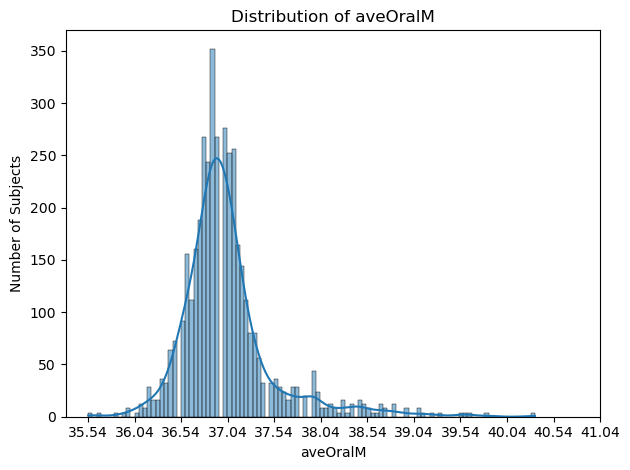

In [17]:
sns.histplot(df['aveOralM'], kde=True)
plt.xlabel('aveOralM')
plt.ylabel('Number of Subjects')
plt.title('Distribution of aveOralM')
plt.xticks(np.arange(df['aveOralM'].min(), df['aveOralM'].max()+1, 0.5))  # Adjust the range and step size as needed
plt.tight_layout() 
plt.show()

In [18]:
df["aveOralM"].mean()

37.02838235294118

<Axes: >

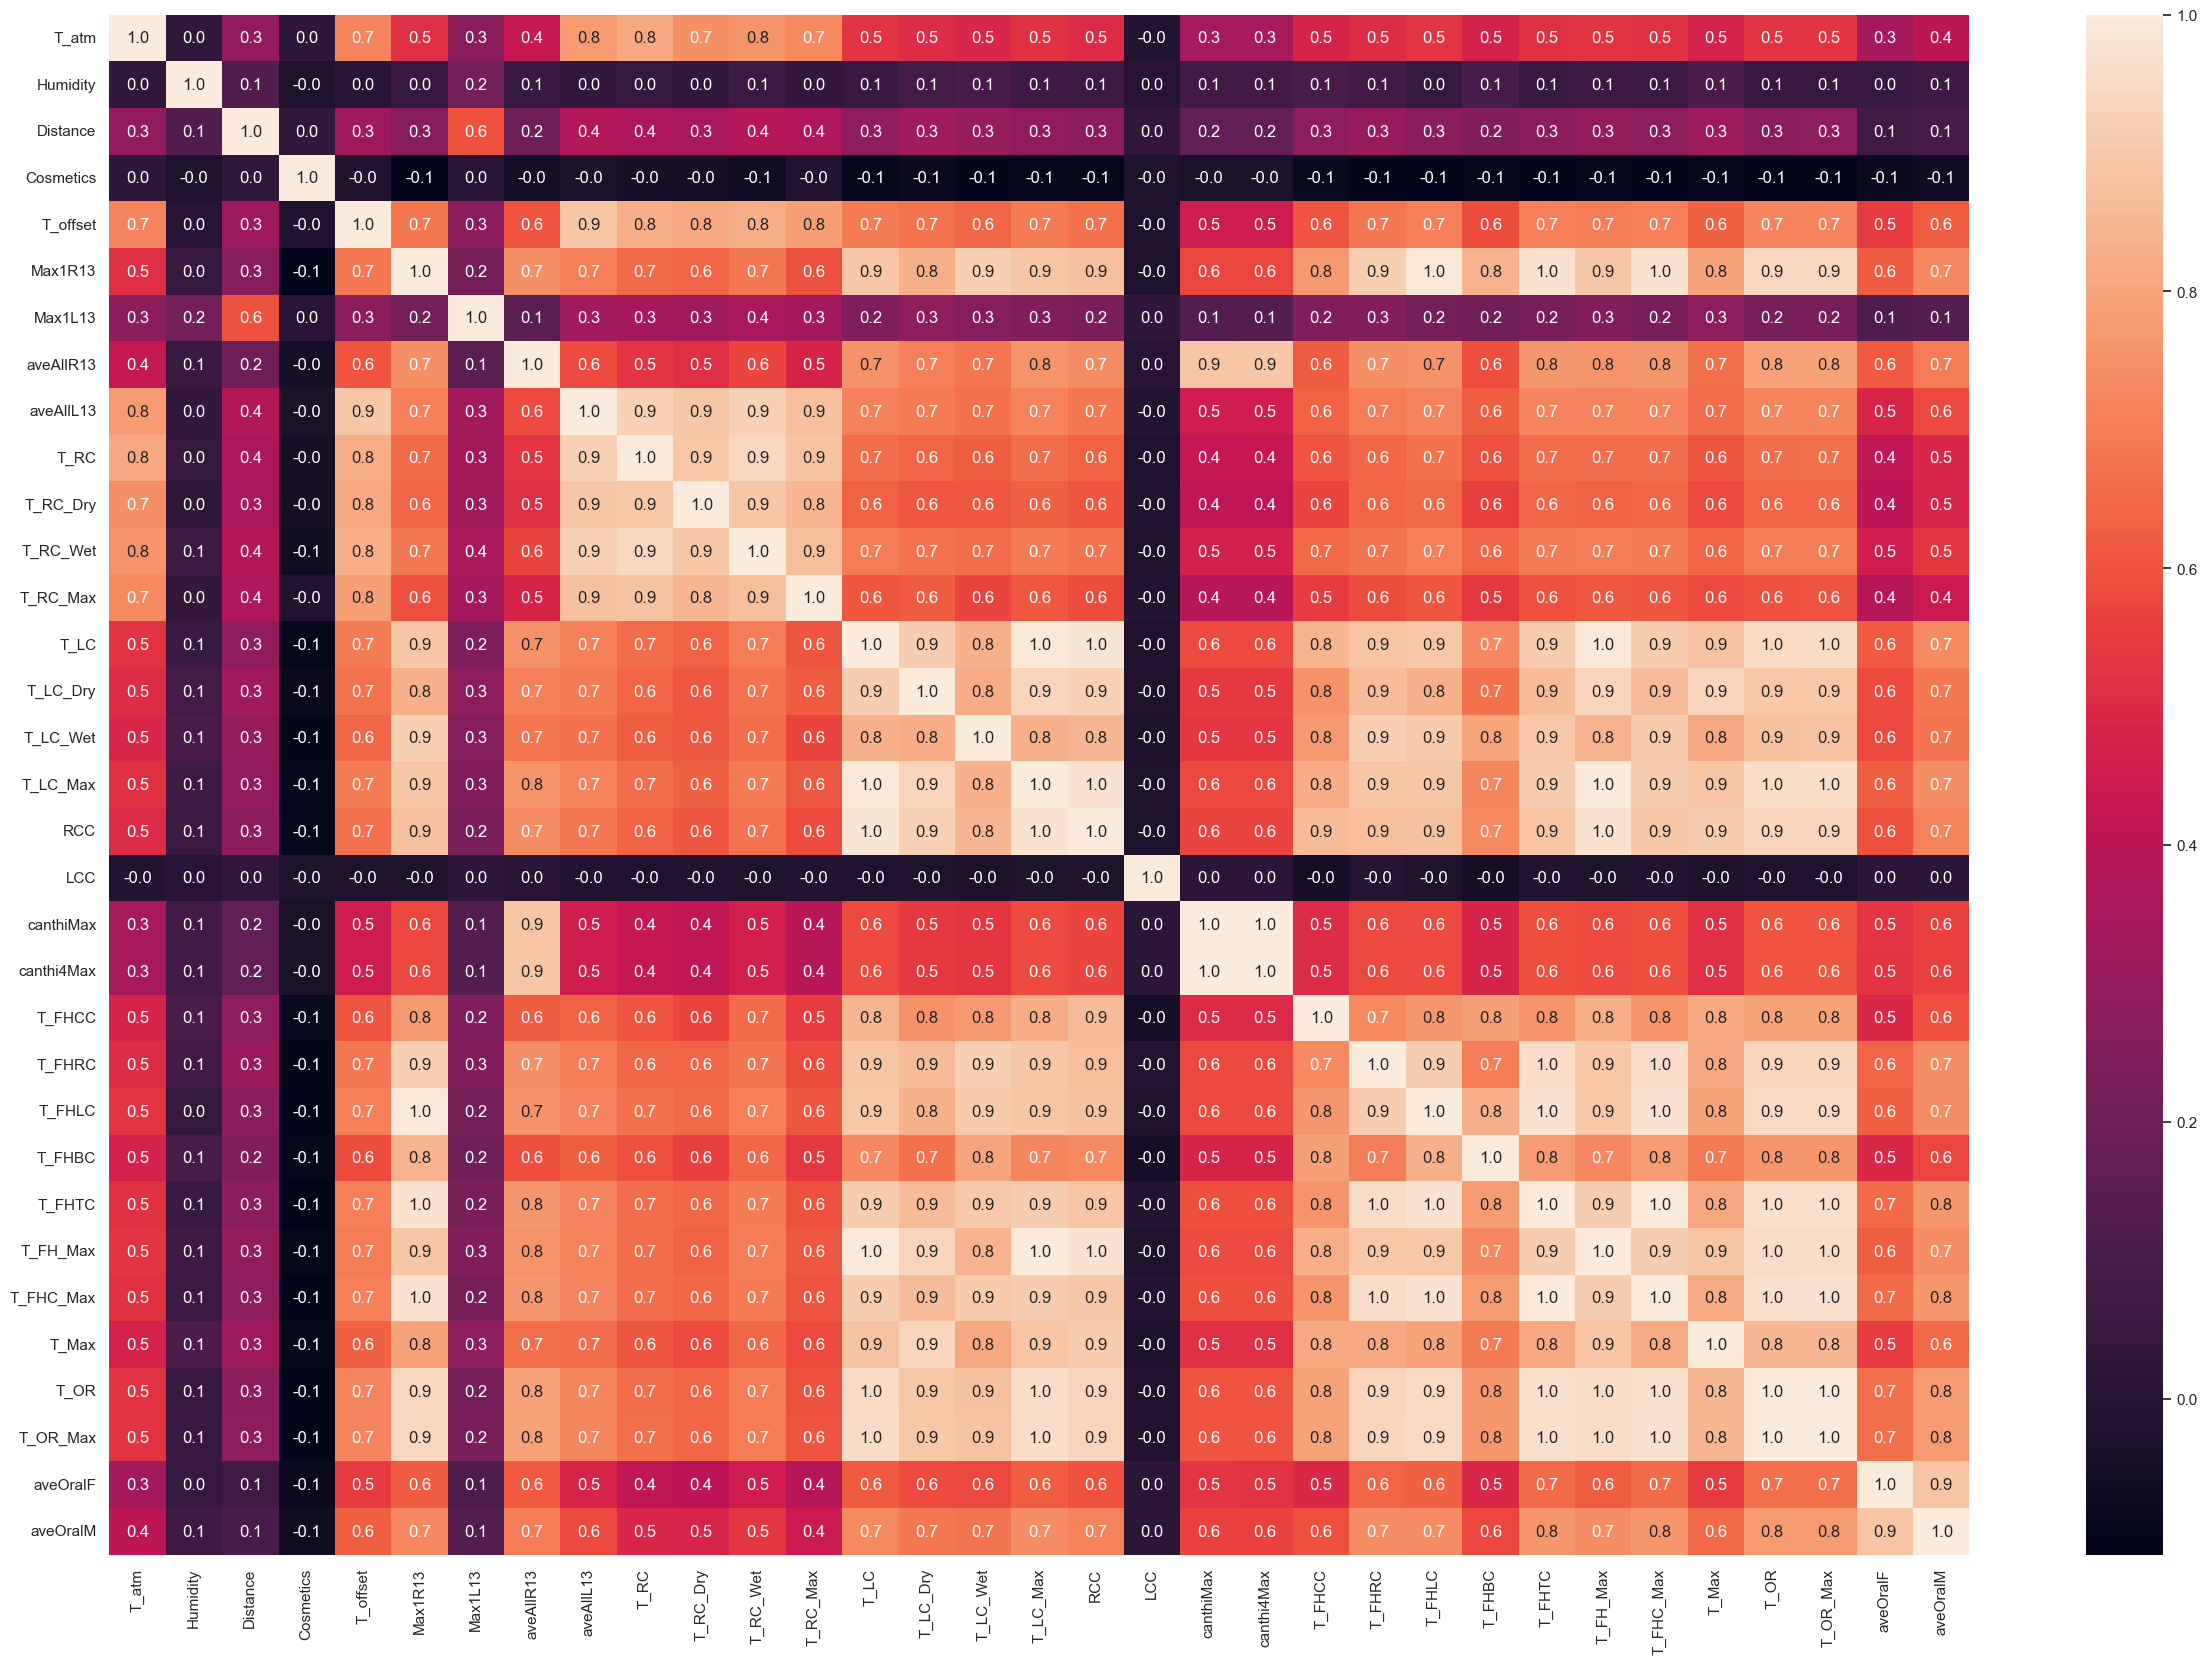

In [19]:
# Correlation Matrix between all features
sns.set(font_scale=1)
correlation_data = df.drop(["Age", "Ethnicity", "Gender"], axis = 1).corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_data, annot=True, fmt='.1f')

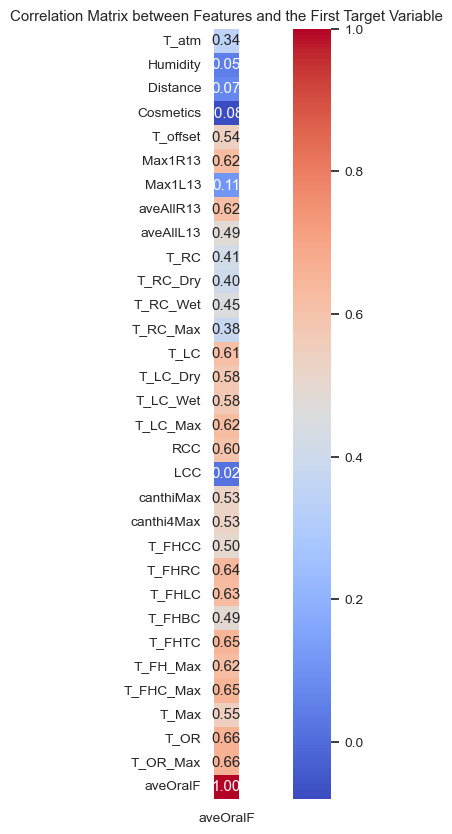

In [20]:
# Correlation matrix between features and the First Target Variable (average oral 
# temperature measured twice with the oral thermometer under fast mode.
correlation_matrix = df.drop(['aveOralM', 'Gender', 'Age', 'Ethnicity'], axis=1).corr()
target_correlation = correlation_matrix['aveOralF']
plt.figure(figsize=(14, 10))
sns.set(font_scale=0.9)
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix between Features and the First Target Variable')
plt.show()

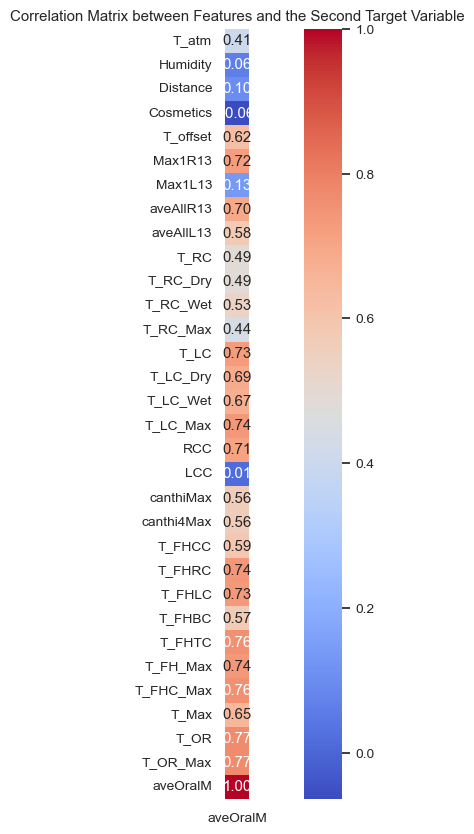

In [21]:
# Correlation matrix between features and the Second Target Variable (average oral 
# temperature measured twice with the oral thermometer under monitor mode.
correlation_matrix = df.drop(['aveOralF', 'Gender', 'Age', 'Ethnicity'], axis=1).corr()
target_correlation = correlation_matrix['aveOralM']
plt.figure(figsize=(14, 10))
sns.set(font_scale=0.9)
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix between Features and the Second Target Variable')
plt.show()

# 4. Model Training with Default Parameters

## 4.1 80-20 Split

In [22]:
y = pd.DataFrame(df.iloc[:,35])
X = df.drop(["aveOralM", "aveOralF"], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
y_train.shape

(3264, 1)

In [24]:
X_test.shape

(816, 34)

### Dummy Regressor

In [25]:
from sklearn.dummy import DummyRegressor
#Create Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
# Train the model
dummy_regr.fit(X_train, y_train)
# Make predictions using the test set
y_dummy = dummy_regr.predict(X_test)

### Linear Regression

In [26]:
from sklearn import linear_model
# Create Linear Regression Object
lin = linear_model.LinearRegression()
# Train the model
lin.fit(X_train, y_train)
# Make predictions using the test set
y_pred = lin.predict(X_test)

In [27]:
coefficients = lin.coef_.flatten()
print("aveOralM = ")
formatted_coeffs = [f'{coef:.3f}*{column}' for coef, column in zip(coefficients, X.columns)]
print(' + '.join(formatted_coeffs))

print(' + ', lin.intercept_.flatten())

aveOralM = 
-0.071*Gender + 0.011*Age + -0.016*Ethnicity + -0.021*T_atm + 0.010*Humidity + -0.086*Distance + -0.006*Cosmetics + 0.121*T_offset + -0.110*Max1R13 + 0.025*Max1L13 + 0.053*aveAllR13 + 0.065*aveAllL13 + -0.059*T_RC + -0.020*T_RC_Dry + 0.011*T_RC_Wet + -0.061*T_RC_Max + -0.062*T_LC + -0.058*T_LC_Dry + 0.000*T_LC_Wet + -0.036*T_LC_Max + 0.004*RCC + 0.011*LCC + 0.259*canthiMax + -0.222*canthi4Max + -0.032*T_FHCC + 0.082*T_FHRC + 0.069*T_FHLC + 0.011*T_FHBC + 0.141*T_FHTC + 0.198*T_FH_Max + -0.051*T_FHC_Max + 0.046*T_Max + -0.111*T_OR + 0.230*T_OR_Max
 +  [37.09753836]


### Regression Tree

In [28]:
pip install pydotplus

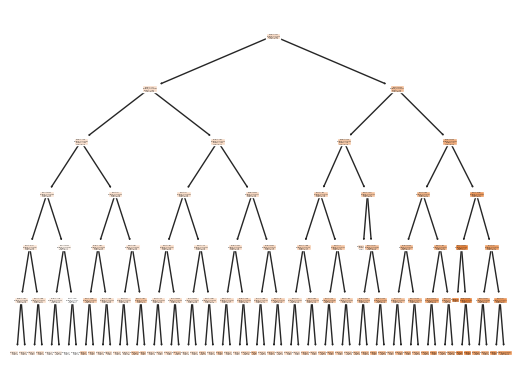

In [29]:
from sklearn.tree import DecisionTreeRegressor
# Create Decistion Tree Regressor
rt = DecisionTreeRegressor(random_state=1, max_depth=6)
# Train the model
rt.fit(X_train, y_train)
# Make predictions using the test set
y_rt = rt.predict(X_test)
#Visualizing the tree
from sklearn import tree
plt.figure()
tree.plot_tree(rt, filled=True)
plt.show()

### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
# Create Random Forest Regressor
rf = RandomForestRegressor(n_estimators= 100, random_state=1)
# Train the model
rf.fit(X_train, y_train)
# Make predictions using the test set
y_rf = rf.predict(X_test)

### KNN Regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)
# Train the model
knn.fit(X_train, y_train)
# Make predictions using the test set
y_knn = knn.predict(X_test)

### Polynomial with Degree 3

In [32]:
from sklearn.preprocessing import PolynomialFeatures
Degree = 3
poly = PolynomialFeatures(degree = Degree)
X_poly = poly.fit_transform(X_train)

# Create the model
pr = linear_model.LinearRegression()
# Train the model
pr.fit(X_poly, y_train)
X_poly_test = poly.transform(X_test) 
# Make predictions using the test set
y_pr = pr.predict(X_poly_test)

print("Number of initial features",X_train.shape[1])
print("Number of polynomial features",X_poly.shape[1])
print("C(10+", Degree, ",", Degree, ") =", X_poly.shape[1])

Number of initial features 34
Number of polynomial features 7770
C(10+ 3 , 3 ) = 7770


### XGBoost

In [33]:
from xgboost import XGBRegressor
# Create the model
xgb = XGBRegressor(random_state=1)
# Train the model
xgb.fit(X_train, y_train)
# Make predictions using the test set
y_xgb = xgb.predict(X_test)

### SVR

In [34]:
from sklearn.svm import SVR
# Create the model
svr = SVR(kernel = 'poly', C=1, epsilon=0.1, degree = 2)
# Train the model
svr.fit(X_train, y_train)
# Make predictions using the test set
y_svr = svr.predict(X_test)

## 4.1.2 Evaluating the Models

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae1 = mean_absolute_error(y_test, y_dummy)
mse1 = mean_squared_error(y_test, y_dummy)
rmse1 = np.sqrt(mean_squared_error(y_test, y_dummy))
r21 = r2_score(y_test, y_dummy)

mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r22 = r2_score(y_test, y_pred)

mae3 = mean_absolute_error(y_test, y_rt)
mse3 = mean_squared_error(y_test, y_rt)
rmse3 = np.sqrt(mean_squared_error(y_test, y_rt))
r23 = r2_score(y_test, y_rt)

mae4 = mean_absolute_error(y_test, y_rf)
mse4 = mean_squared_error(y_test, y_rf)
rmse4 = np.sqrt(mean_squared_error(y_test, y_rf))
r24 = r2_score(y_test, y_rf)

mae5 = mean_absolute_error(y_test, y_knn)
mse5 = mean_squared_error(y_test, y_knn)
rmse5 = np.sqrt(mean_squared_error(y_test, y_knn))
r25 = r2_score(y_test, y_knn)

mae6 = mean_absolute_error(y_test, y_pr)
mse6 = mean_squared_error(y_test, y_pr)
rmse6 = np.sqrt(mean_squared_error(y_test, y_pr))
r26 = r2_score(y_test, y_pr)

mae7 = mean_absolute_error(y_test, y_xgb)
mse7 = mean_squared_error(y_test, y_xgb)
rmse7 = np.sqrt(mean_squared_error(y_test, y_xgb))
r27 = r2_score(y_test, y_xgb)

mae8 = mean_absolute_error(y_test, y_svr)
mse8 = mean_squared_error(y_test, y_svr)
rmse8 = np.sqrt(mean_squared_error(y_test, y_svr))
r28 = r2_score(y_test, y_svr)

### 4.1.3 Comparing the Errors 

In [36]:
dat = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Dummy': [mae1,mse1,rmse1,r21],
        'Linear Reg': [mae2,mse2,rmse2,r22],
        'Reg Tree': [mae3,mse3,rmse3,r23],
        'Random Forest': [mae4,mse4,rmse4,r24],
        'KNN': [mae5, mse5, rmse5, r25],
        'Poly Reg': [mae6, mse6, rmse6, r26],
        'XGB': [mae7, mse7, rmse7, r27],
        'SVR': [mae8, mse8, rmse8, r28],
        }
comparison = pd.DataFrame (dat, columns = ['Metric','Dummy','Linear Reg','Reg Tree','Random Forest',
                                           'KNN', 'Poly Reg', 'XGB', 'SVR'])
comparison

,Metric,Dummy,Linear Reg,Reg Tree,Random Forest,KNN,Poly Reg,XGB,SVR
0,MAE,0.340954,0.225026,0.207798,0.159975,0.136193,0.600373,0.150246,0.215470
1,MSE,0.298159,0.089611,0.076798,0.047476,0.040713,1.602359,0.040523,0.088310
2,RMSE,0.546040,0.299351,0.277125,0.217890,0.201774,1.265843,0.201303,0.297169
3,R2,-0.007029,0.697340,0.740615,0.839651,0.862493,-4.411940,0.863135,0.701735


### 4.1.4 Visualize the Predictions/Errors for Each Regressor

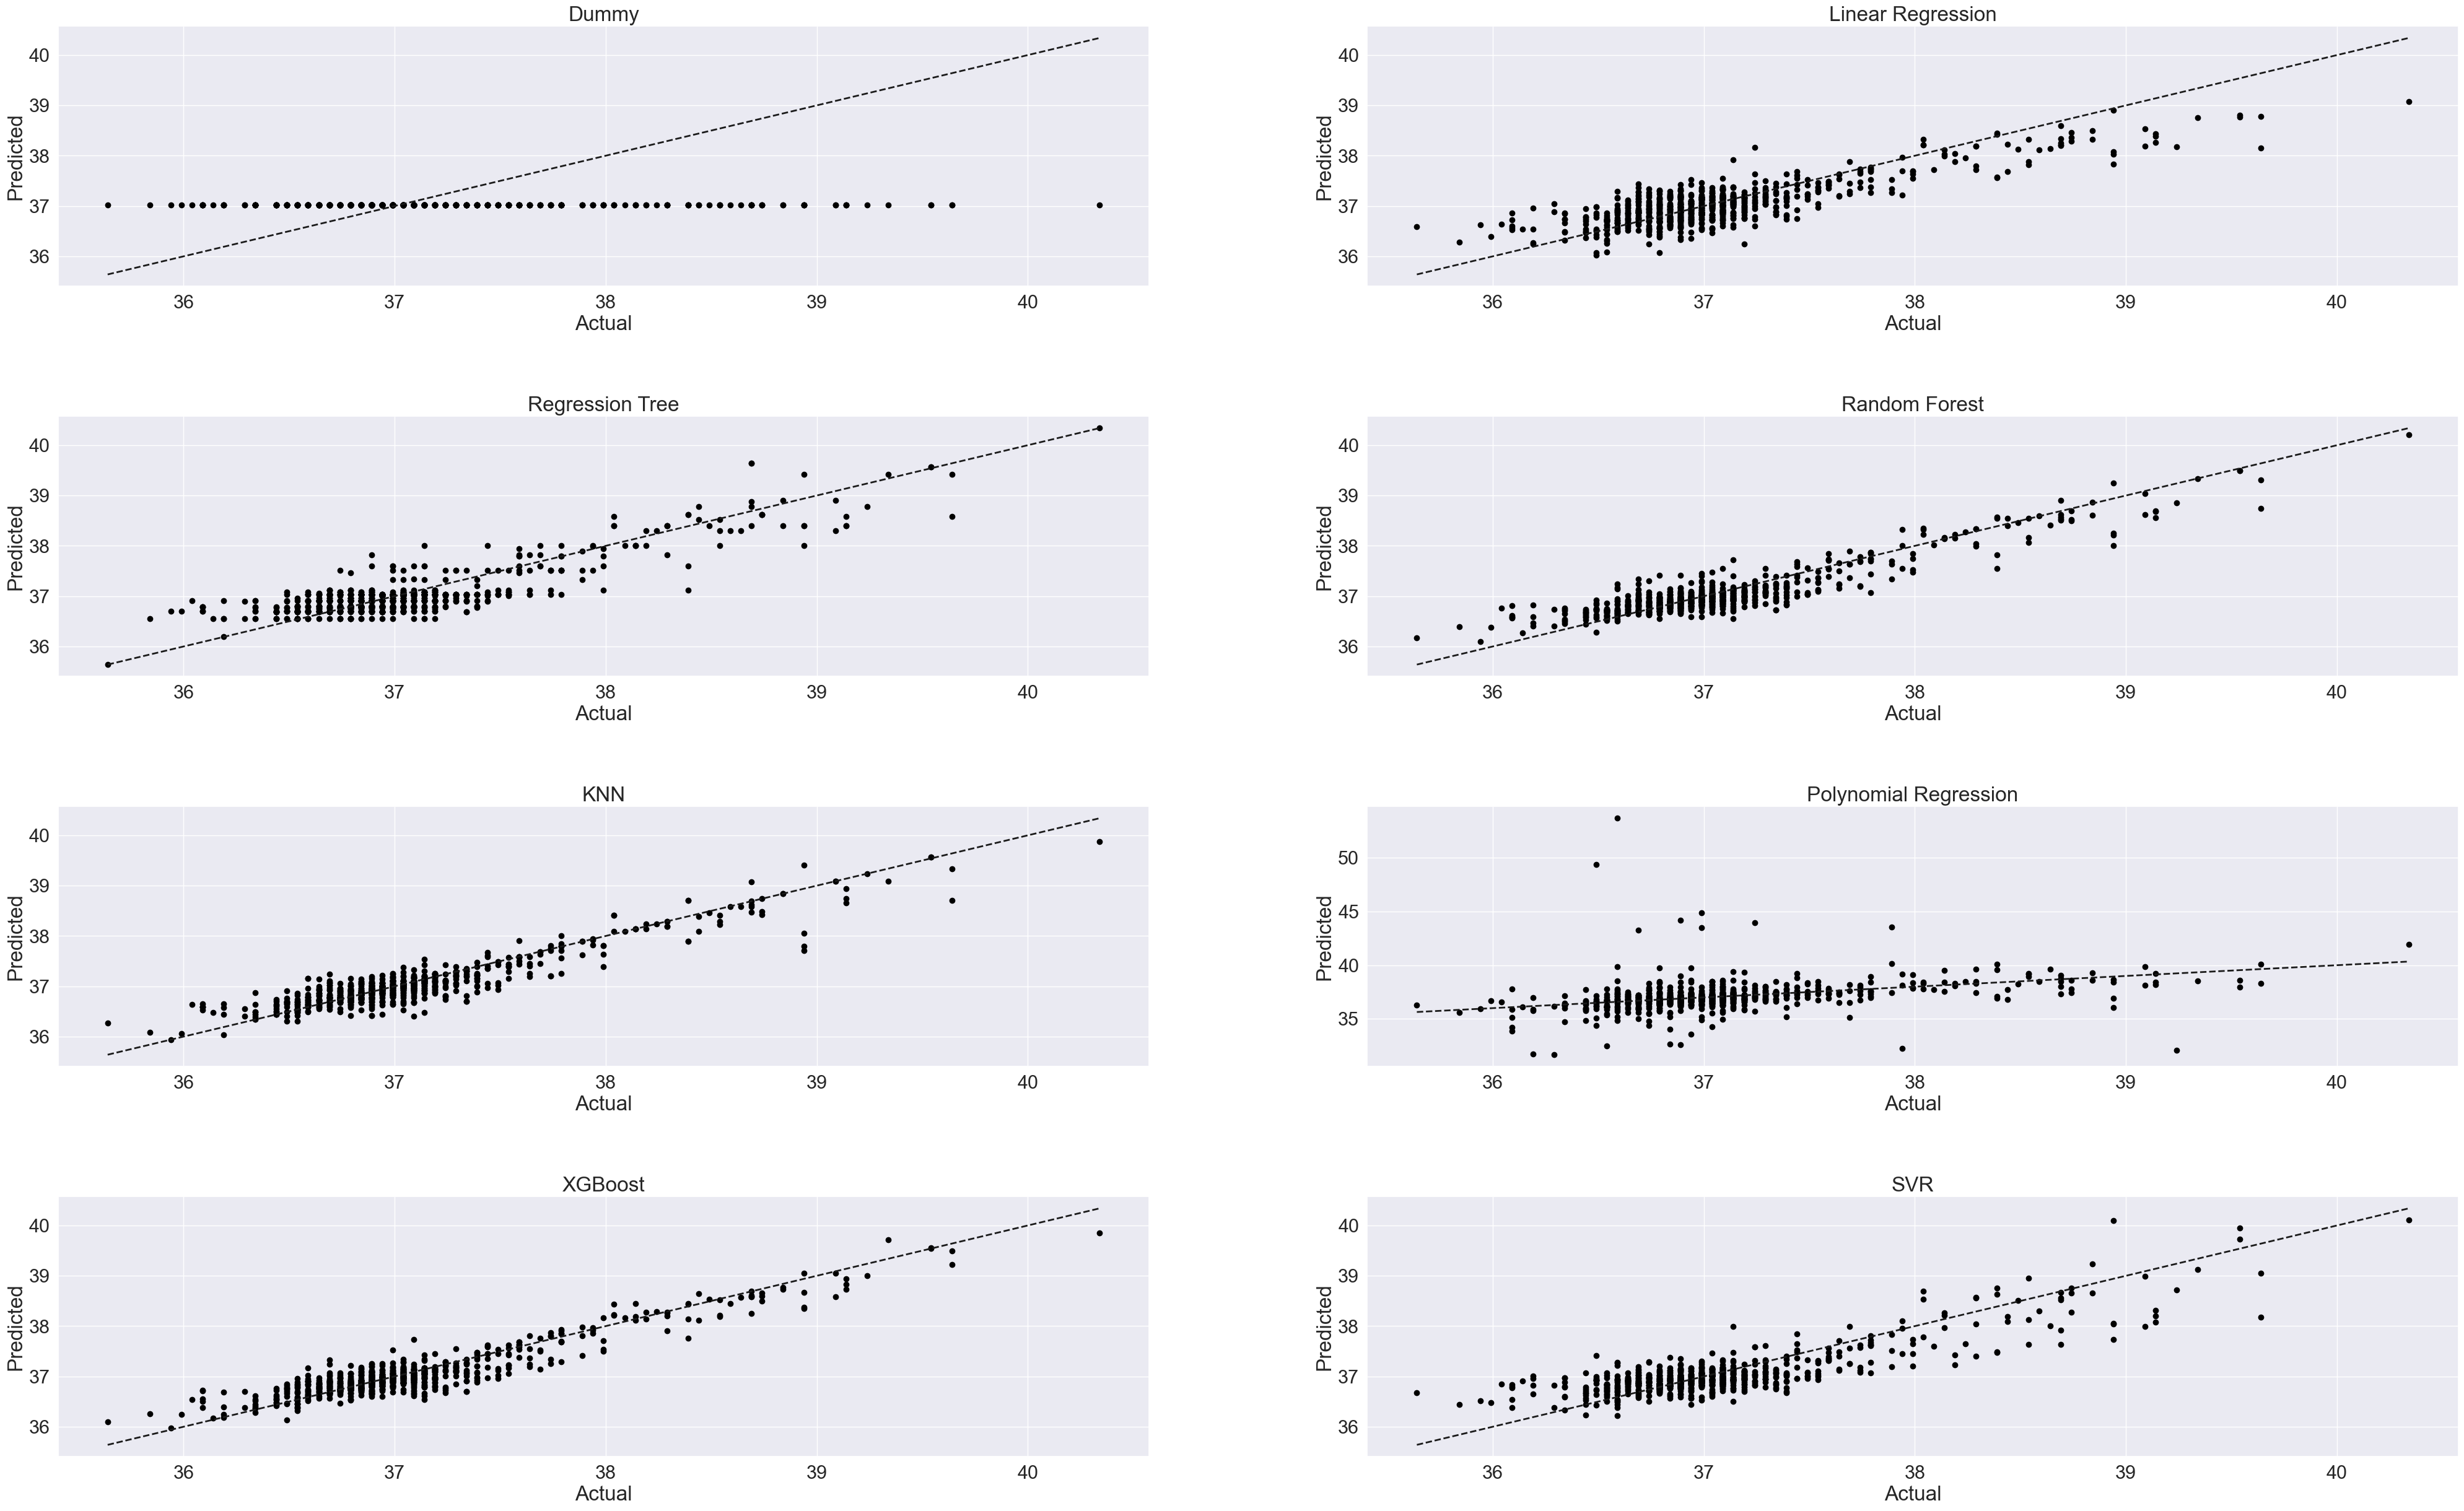

In [37]:
sns.set(font_scale=2)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(50,30))
plt.subplots_adjust(hspace=0.5)

ax1.scatter(y_test, y_dummy, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Dummy')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Linear Regression')
ax2.set(xlabel='Actual', ylabel='Predicted')

ax3.scatter(y_test, y_rt, color='black')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Regression Tree')
ax3.set(xlabel='Actual', ylabel='Predicted')

ax4.scatter(y_test, y_rf, color='black')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_title('Random Forest')
ax4.set(xlabel='Actual', ylabel='Predicted')

ax5.scatter(y_test, y_knn, color='black')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_title('KNN')
ax5.set(xlabel='Actual', ylabel='Predicted')

ax6.scatter(y_test, y_pr, color='black')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_title('Polynomial Regression')
ax6.set(xlabel='Actual', ylabel='Predicted')

ax7.scatter(y_test, y_xgb, color='black')
ax7.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax7.set_title('XGBoost')
ax7.set(xlabel='Actual', ylabel='Predicted')

ax8.scatter(y_test, y_svr, color='black')
ax8.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax8.set_title('SVR')
ax8.set(xlabel='Actual', ylabel='Predicted')

plt.savefig('scatter_plots.png', format='png')

## 4.2 Cross-validation

In [38]:
#15-fold Cross validaiton
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
kf = KFold(n_splits=15, shuffle=True)

### Dummy Regressor

In [39]:
dummy2 = DummyRegressor(strategy="mean")
scores = cross_validate(dummy2, X, y, cv=kf, scoring=scoring)
y_dummy2 = cross_val_predict(dummy2, X, y, cv=kf)
# Evaluating the errors
mae12 = np.mean(scores['test_neg_mean_absolute_error']*(-1))
mse12 = np.mean(scores['test_neg_mean_squared_error']*(-1))
rmse12 = np.mean(scores['test_neg_root_mean_squared_error']*(-1))
r212 = np.mean(scores['test_r2'])

### Linear Regression

In [40]:
lin2 = linear_model.LinearRegression()
np.random.seed(seed=1)
scores2 = cross_validate(lin2, X, y, cv=kf, scoring=scoring)
y_pred2 = cross_val_predict(lin2, X, y, cv=kf)
# Evaluating the errors
mae22 = np.mean(scores2['test_neg_mean_absolute_error']*(-1))
mse22 = np.mean(scores2['test_neg_mean_squared_error']*(-1))
rmse22 = np.mean(scores2['test_neg_root_mean_squared_error']*(-1))
r222 = np.mean(scores2['test_r2'])

### Regression Tree 

In [41]:
rt2 = DecisionTreeRegressor(random_state=1, max_depth=6)
scores3 = cross_validate(rt2, X, y, cv=kf, scoring=scoring)
y_rt2 = cross_val_predict(rt2, X, y, cv=kf)
# Evaluating the errors
mae32 = np.mean(scores3['test_neg_mean_absolute_error']*(-1))
mse32 = np.mean(scores3['test_neg_mean_squared_error']*(-1))
rmse32 = np.mean(scores3['test_neg_root_mean_squared_error']*(-1))
r232 = np.mean(scores3['test_r2'])

### Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators= 100, random_state=1)
scores4 = cross_validate(rf2, X, y.values.ravel(), cv=kf, scoring=scoring)
y_rf2 = cross_val_predict(rf2, X, y.values.ravel(), cv=kf)
# Evaluating the models
mae42 = np.mean(scores4['test_neg_mean_absolute_error']*(-1))
mse42 = np.mean(scores4['test_neg_mean_squared_error']*(-1))
rmse42 = np.mean(scores4['test_neg_root_mean_squared_error']*(-1))
r242 = np.mean(scores4['test_r2'])

### KNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn2 = KNeighborsRegressor(n_neighbors=3)
scores5 = cross_validate(knn2, X, y, cv=kf, scoring=scoring)
y_knn2 = cross_val_predict(knn2, X, y, cv=kf)
# Evaluating the models
mae52 = np.mean(scores5['test_neg_mean_absolute_error']*(-1))
mse52 = np.mean(scores5['test_neg_mean_squared_error']*(-1))
rmse52 = np.mean(scores5['test_neg_root_mean_squared_error']*(-1))
r252 = np.mean(scores5['test_r2'])

### Polynomial with Degree 3

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)
pr2 = LinearRegression()
pr2.fit(X_poly, y_train)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)
y_pr2 = cross_val_predict(pr2, X_poly, y_train, cv=kf)
# Perform cross-validation
scores6 = cross_validate(pr2, X_poly, y_train, cv=kf,
                          scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'],
                          return_train_score=False)
# Evaluate the errors
mae62 = np.mean(-scores6['test_neg_mean_absolute_error'])
mse62 = np.mean(-scores6['test_neg_mean_squared_error'])
rmse62 = np.mean(-scores6['test_neg_root_mean_squared_error'])
r262 = np.mean(scores6['test_r2'])

### XGBoost

In [45]:
import xgboost as xgb
from xgboost import cv
# Create the model
xgb2 = xgb.XGBRegressor(tree_method="hist")
# Train the model
scores7 = cross_validate(xgb2, X, y, cv=kf, scoring=scoring)
y_xgb2 = cross_val_predict(xgb2, X, y, cv=kf)
# Evaluate the errors
mae72 = np.mean(-scores7['test_neg_mean_absolute_error'])
mse72 = np.mean(-scores7['test_neg_mean_squared_error'])
rmse72 = np.mean(-scores7['test_neg_root_mean_squared_error'])
r272 = np.mean(scores7['test_r2'])

### SVR

In [46]:
svr2 = SVR(kernel = 'poly', C=1, epsilon=0.1, degree = 2)
scores8 = cross_validate(svr2, X, y.values.ravel(), cv=kf, scoring=scoring)
y_svr2 = cross_val_predict(svr2, X, y.values.ravel(), cv=kf)
# Evaluate the errors
mae82 = np.mean(-scores8['test_neg_mean_absolute_error'])
mse82 = np.mean(-scores8['test_neg_mean_squared_error'])
rmse82 = np.mean(-scores8['test_neg_root_mean_squared_error'])
r282 = np.mean(scores8['test_r2'])

## 5. Comparing the 80-20 Split and 15-Fold Cross-Validation

In [47]:
dat = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
       'Dummy': [mae1,mse1,rmse1,r21],
        'Dummy 2': [mae12,mse12,rmse12,r212],
        'Linear Reg': [mae2,mse2,rmse2,r22],
        'Linear Reg 2': [mae22,mse22,rmse22,r222],
        'Reg Tree': [mae3,mse3,rmse3,r23],
        'Reg Tree 2': [mae32, mse32, rmse32, r232],
        'Random Forest': [mae4, mse4, rmse4, r24],
        'Random Forest 2': [mae42, mse42, rmse42, r242],
        'KNN': [mae5, mse5, rmse5, r25],
        'KNN 2': [mae52, mse52, rmse52, r252],
        'Poly Reg': [mae6,mse6,rmse6,r26],
        'Poly Reg 2': [mae62,mse62,rmse62,r262],
        'XGB': [mae7,mse7,rmse7,r27],
        'XGB 2': [mae72,mse72,rmse72,r272],
        'SVR': [mae8,mse8,rmse8,r28],
        'SVR 2': [mae82,mse82,rmse82,r282],
        }
comparison = pd.DataFrame (dat, columns = ['Metric','Dummy','Dummy 2','Linear Reg','Linear Reg 2','Reg Tree','Reg Tree 2','Random Forest', 
                                           'Random Forest 2', 'KNN','KNN 2', 'Poly Reg', 'Poly Reg 2', 'XGB', 'XGB 2', 'SVR', 'SVR 2'])
comparison

,Metric,Dummy,Dummy 2,Linear Reg,Linear Reg 2,Reg Tree,Reg Tree 2,Random Forest,Random Forest 2,KNN,KNN 2,Poly Reg,Poly Reg 2,XGB,XGB 2,SVR,SVR 2
0,MAE,0.340954,0.332856,0.225026,0.226149,0.207798,0.207032,0.159975,0.151642,0.136193,0.123444,0.600373,0.696582,0.150246,0.148633,0.215470,0.210398
1,MSE,0.298159,0.259503,0.089611,0.086658,0.076798,0.076605,0.047476,0.042395,0.040713,0.036045,1.602359,62.229773,0.040523,0.040659,0.088310,0.086333
2,RMSE,0.546040,0.506805,0.299351,0.294200,0.277125,0.276030,0.217890,0.205328,0.201774,0.189210,1.265843,4.627836,0.201303,0.201597,0.297169,0.293633
3,R2,-0.007029,-0.004799,0.697340,0.657368,0.740615,0.692885,0.839651,0.832578,0.862493,0.858478,-4.411940,-287.645993,0.863135,0.841960,0.701735,0.665574


The 15-fold cross-validation shows better results.

# 6. Feature Selection

## 6.1 Univariate Selection

In [48]:
# Feature Selection with Univariate Statistical Tests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions
# Feature selection, top 20 features
test = SelectKBest(score_func=f_regression, k=20)
fit = test.fit(X_train, y_train.values.ravel())
# Summarize scores
# The scores are the importances of the features
set_printoptions(precision=1)
print(fit.scores_)

[9.0e+00 1.7e+01 3.8e+01 5.8e+02 9.6e+00 2.9e+01 1.1e+01 1.9e+03 3.5e+03
 5.7e+01 3.0e+03 1.5e+03 9.7e+02 9.4e+02 1.2e+03 7.6e+02 3.6e+03 2.8e+03
 2.6e+03 3.8e+03 3.2e+03 6.2e-01 1.5e+03 1.5e+03 1.7e+03 3.8e+03 3.6e+03
 1.6e+03 4.2e+03 3.8e+03 4.2e+03 2.3e+03 4.6e+03 4.6e+03]


In [49]:
# Get the indices of the selected features
selected_indices = fit.get_support(indices=True)
# Get the names of the selected features
selected_features1 = X_train.columns[selected_indices]
print("Selected features from OS:", selected_features1.tolist())

Selected features from OS: ['T_offset', 'Max1R13', 'aveAllR13', 'aveAllL13', 'T_LC', 'T_LC_Dry', 'T_LC_Wet', 'T_LC_Max', 'RCC', 'canthiMax', 'T_FHCC', 'T_FHRC', 'T_FHLC', 'T_FHBC', 'T_FHTC', 'T_FH_Max', 'T_FHC_Max', 'T_Max', 'T_OR', 'T_OR_Max']


## 6.2 mRMR

In [50]:
#pip install mrmr_selection

In [51]:
from sklearn.datasets import make_regression
from mrmr import mrmr_regression
# Select top 20 features using mRMR 
selected_features2 = mrmr_regression(X=X_train, y=y_train, K=20)
print("Selected features from mRMR:", selected_features2)

100%|██████████| 20/20 [00:01<00:00, 18.28it/s]

Selected features from mRMR: ['T_OR_Max', 'T_OR', 'T_FHTC', 'T_FHC_Max', 'T_FH_Max', 'T_FHRC', 'T_LC_Max', 'aveAllR13', 'T_LC', 'T_FHLC', 'Max1R13', 'RCC', 'T_LC_Dry', 'T_LC_Wet', 'T_offset', 'T_Max', 'canthiMax', 'canthi4Max', 'T_FHCC', 'aveAllL13']


In [52]:
intersection = set(selected_features1).intersection(set(selected_features2))
print(len(intersection))

19


Both methods selected 20 best features out of 34. 19 out of the 20 chosen were matching.

In [53]:
X_new = fit.transform(X_train)
selected_features2 = fit.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features2]
X_new = pd.DataFrame(data=X_new, columns=selected_feature_names)
X_new

,T_offset,Max1R13,aveAllR13,aveAllL13,T_LC,T_LC_Dry,T_LC_Wet,T_LC_Max,RCC,canthiMax,T_FHCC,T_FHRC,T_FHLC,T_FHBC,T_FHTC,T_FH_Max,T_FHC_Max,T_Max,T_OR,T_OR_Max
0,0.275518,-1.131238,-0.490146,0.412307,0.231788,0.388746,-0.911024,0.143656,0.243242,-0.062766,0.720893,0.055881,-0.767695,-0.513522,-0.160027,0.180077,-0.142538,0.749204,-0.069319,-0.033495
1,1.240677,1.481460,0.743483,1.486720,1.543708,1.448402,1.211206,1.561683,1.613853,0.238929,1.603523,1.287824,1.445847,1.494492,1.387451,1.506832,1.369708,1.481261,1.368190,1.331811
2,-0.596837,0.480492,0.076656,-0.393503,0.878763,0.355107,0.274928,0.834490,0.910976,-0.141470,0.619607,0.671853,0.381974,0.348894,0.480309,0.834367,0.497942,-0.062425,0.631006,0.630708
3,0.646733,0.989459,0.293375,0.680910,0.788905,0.136448,0.508998,0.798130,0.875832,0.553742,0.851117,0.500750,0.913911,0.760795,0.871625,0.743493,0.818183,0.064890,0.723154,0.686058
4,-0.281305,-0.656202,0.343387,-0.762832,-1.745077,-1.040947,-1.051465,-1.456169,-1.830247,0.593094,-1.073306,-0.833856,-0.750536,-0.320444,-0.853724,-1.437474,-0.907557,-1.303739,-1.064517,-1.122050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,-0.615398,-1.165169,0.543435,-0.645319,-0.451129,0.237367,-1.082674,-0.092681,-1.109797,0.750500,-1.869121,-0.046781,-1.093721,-1.092757,-0.231176,-0.056195,-0.249285,-1.319653,-0.308904,-0.273346
3260,0.201275,0.107249,-0.556829,0.244430,-0.415186,-0.216771,0.321742,-0.474458,-0.354204,-0.390696,-0.060452,0.295426,0.107426,0.014225,0.071205,-0.474213,0.106538,-0.428453,-0.106178,-0.070395
3261,-0.058576,-0.724064,0.310046,-0.242414,-0.846502,-0.384970,-0.739373,-0.747155,-1.144941,0.566859,-1.898059,-0.799635,-0.527466,-0.500650,-0.658066,-0.728660,-0.676272,-0.444367,-0.677496,-0.771499
3262,-0.912370,-0.350821,-1.023608,-0.477441,-0.289385,-0.637269,-0.411675,-0.365379,-0.301488,-0.849798,-0.639226,-0.679863,-0.373033,-0.642241,-0.533557,-0.346990,-0.516152,-0.619424,-0.585348,-0.568548


## 7. Model Training with Default Parameters with 20 Best Features

In [54]:
common_features = X.columns.intersection(X_new.columns)
X2 = df[common_features]

In [55]:
dummy20 = DummyRegressor(strategy="mean")
scores = cross_validate(dummy20, X2, y, cv=kf, scoring=scoring)
y_dummy20 = cross_val_predict(dummy20, X2, y, cv=kf)

lin20 = linear_model.LinearRegression()
np.random.seed(seed=1)
scores2 = cross_validate(lin20, X2, y, cv=kf, scoring=scoring)
y_pred20 = cross_val_predict(lin20, X2, y, cv=kf)

rt20 = DecisionTreeRegressor(random_state=1, max_depth=6)
scores3 = cross_validate(rt20, X2, y, cv=kf, scoring=scoring)
y_rt20 = cross_val_predict(rt20, X2, y, cv=kf)

from sklearn.ensemble import RandomForestRegressor
rf20 = RandomForestRegressor(n_estimators= 100, random_state=1)
scores4 = cross_validate(rf20, X2, y.values.ravel(), cv=kf, scoring=scoring)
y_rf20 = cross_val_predict(rf20, X2, y.values.ravel(), cv=kf)

knn20 = KNeighborsRegressor(n_neighbors=3)
scores5 = cross_validate(knn20, X2, y, cv=kf, scoring=scoring)
y_knn20 = cross_val_predict(knn20, X2, y, cv=kf)

degree = 3
poly20 = PolynomialFeatures(degree=degree)
X_poly20 = poly20.fit_transform(X_new)
pr20 = LinearRegression()
pr20.fit(X_poly, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
y_pr20 = cross_val_predict(pr20, X_poly20, y_train, cv=kf)
# Perform cross-validation
scores6 = cross_validate(pr20, X_poly20, y_train, cv=kf,
                          scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'],
                          return_train_score=False)

xgb20 = xgb.XGBRegressor(tree_method="hist")
scores7 = cross_validate(xgb20, X2, y, cv=kf, scoring=scoring)
y_xgb20 = cross_val_predict(xgb20, X2, y, cv=kf)

svr20 = SVR(kernel = 'poly', C=1, epsilon=0.1, degree = 2)
scores8 = cross_validate(svr20, X2, y.values.ravel(), cv=kf, scoring=scoring)
y_svr20 = cross_val_predict(svr20, X2, y.values.ravel(), cv=kf)

In [56]:
mae120 = np.mean(scores['test_neg_mean_absolute_error']*(-1))
mse120 = np.mean(scores['test_neg_mean_squared_error']*(-1))
rmse120 = np.mean(scores['test_neg_root_mean_squared_error']*(-1))
r2120 = np.mean(scores['test_r2'])
mae220 = np.mean(scores2['test_neg_mean_absolute_error']*(-1))
mse220 = np.mean(scores2['test_neg_mean_squared_error']*(-1))
rmse220 = np.mean(scores2['test_neg_root_mean_squared_error']*(-1))
r2220 = np.mean(scores2['test_r2'])
mae320 = np.mean(scores3['test_neg_mean_absolute_error']*(-1))
mse320 = np.mean(scores3['test_neg_mean_squared_error']*(-1))
rmse320 = np.mean(scores3['test_neg_root_mean_squared_error']*(-1))
r2320 = np.mean(scores3['test_r2'])
mae420 = np.mean(scores4['test_neg_mean_absolute_error']*(-1))
mse420 = np.mean(scores4['test_neg_mean_squared_error']*(-1))
rmse420 = np.mean(scores4['test_neg_root_mean_squared_error']*(-1))
r2420 = np.mean(scores4['test_r2'])
mae520 = np.mean(scores5['test_neg_mean_absolute_error']*(-1))
mse520 = np.mean(scores5['test_neg_mean_squared_error']*(-1))
rmse520 = np.mean(scores5['test_neg_root_mean_squared_error']*(-1))
r2520 = np.mean(scores5['test_r2'])
mae620 = np.mean(-scores6['test_neg_mean_absolute_error'])
mse620 = np.mean(-scores6['test_neg_mean_squared_error'])
rmse620 = np.mean(-scores6['test_neg_root_mean_squared_error'])
r2620 = np.mean(scores6['test_r2'])
mae720 = np.mean(-scores7['test_neg_mean_absolute_error'])
mse720 = np.mean(-scores7['test_neg_mean_squared_error'])
rmse720 = np.mean(-scores7['test_neg_root_mean_squared_error'])
r2720 = np.mean(scores7['test_r2'])
mae820 = np.mean(-scores8['test_neg_mean_absolute_error'])
mse820 = np.mean(-scores8['test_neg_mean_squared_error'])
rmse820 = np.mean(-scores8['test_neg_root_mean_squared_error'])
r2820 = np.mean(scores8['test_r2'])

In [57]:
dat = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Dummy 2': [mae12,mse12,rmse12,r212],
        'Dummy_20': [mae120,mse120,rmse120,r2120],
        'Linear Reg 2': [mae22,mse22,rmse22,r222],
        'Linear Reg_20': [mae220,mse220,rmse220,r2220],
        'Reg Tree 2': [mae32,mse32,rmse32,r232],
        'Reg Tree_20': [mae320,mse320,rmse320,r2320],
        'Random Forest 2': [mae42,mse42,rmse42,r242],
        'Random Forest_20': [mae420,mse420,rmse420,r2420],
        'KNN 2': [mae52, mse52, rmse52, r252],
        'KNN_20': [mae520, mse520, rmse520, r2520],
        'Poly Reg 2': [mae62, mse62, rmse62, r262],
        'Poly Reg_20': [mae620, mse620, rmse620, r2620],
        'XGB 2': [mae72, mse72, rmse72, r272],
        'XGB_20': [mae720, mse720, rmse720, r2720],
        'SVR 2': [mae82, mse82, rmse82, r282],
        'SVR_20': [mae820, mse820, rmse820, r2820],
        }
comparison = pd.DataFrame (dat, columns = ['Metric','Dummy 2','Dummy_20','Linear Reg 2','Linear Reg_20','Reg Tree 2','Reg Tree_20','Random Forest 2',
                                           'Random Forest_20','KNN 2', 'KNN_20', 'Poly Reg 2', 'Poly Reg_20', 'XGB 2', 'XGB_20', 'SVR 2', 'SVR_20'])
comparison

,Metric,Dummy 2,Dummy_20,Linear Reg 2,Linear Reg_20,Reg Tree 2,Reg Tree_20,Random Forest 2,Random Forest_20,KNN 2,KNN_20,Poly Reg 2,Poly Reg_20,XGB 2,XGB_20,SVR 2,SVR_20
0,MAE,0.332856,0.332909,0.226149,0.240139,0.207032,0.215805,0.151642,0.194720,0.123444,0.208836,0.696582,1.668764,0.148633,0.204685,0.210398,0.279363
1,MSE,0.259503,0.259570,0.086658,0.095860,0.076605,0.083894,0.042395,0.065823,0.036045,0.078106,62.229773,3001.567598,0.040659,0.073045,0.086333,0.148675
2,RMSE,0.506805,0.509097,0.294200,0.309533,0.276030,0.289479,0.205328,0.256463,0.189210,0.279303,4.627836,25.683406,0.201597,0.270100,0.293633,0.385577
3,R2,-0.004799,-0.002318,0.657368,0.628439,0.692885,0.674581,0.832578,0.744385,0.858478,0.696457,-287.645993,-14001.705211,0.841960,0.715663,0.665574,0.422717


From the comparison table we can conclude that choosing 20 best features generally increases the errors, hence we will not use the X_new dataframe for further training.

# 8. Hyperparameter Optimization

We will optimize the parameters for the 3 models with the best performances: KNN, XGB and RF.

## Bayesian Optimization

In [58]:
np.append(range(3,30),None)
!pip install hyperopt

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 8.1.1 KNN

In [73]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

n_n = list(range(3, 31))
w = ['uniform', 'distance']
p_ = [1, 2, 3]

space = {'n_neighbors': hp.choice('n_neighbors', n_n),
          'weights' : hp.choice('weights',w),
          'p' : hp.choice('p',p_)
         }
def objective(space):
    model_knn_b = KNeighborsRegressor(n_neighbors=space['n_neighbors'],
                                      weights=space['weights'],
                                      p=space['p'])
    mae_knn_b = cross_val_score(model_knn_b, X_train, y_train.values.ravel(), cv = 10, 
                          scoring='neg_mean_absolute_error').mean()
    return {'loss': -mae_knn_b, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 30,
            trials= trials)
best

100%|██████████| 30/30 [00:49<00:00,  1.66s/trial, best loss: 0.11789702675190275]


{'n_neighbors': 0, 'p': 0, 'weights': 1}

In [74]:
print("Weights:", w[best['weights']],", Number of Neighbors: ", n_n[best['n_neighbors']], ", p: " , p_[best['p']])
#p = 1: Manhattan distance, p=2: Euclidean_distance, arbitrary p: Minkowski_distance

Weights: distance , Number of Neighbors:  3 , p:  1


In [75]:
knn_b = KNeighborsRegressor(n_neighbors = n_n[best['n_neighbors']], 
                            weights = w[best['weights']], 
                            p = p_[best['p']]
                           )


# Final evaluation on the test data
knn_b.fit(X_train, y_train)
y_knn_b = knn_b.predict(X_test)

mae_knn_b = mean_absolute_error(y_test, y_knn_b)
mse_knn_b = mean_squared_error(y_test, y_knn_b)
rmse_knn_b = np.sqrt(mean_squared_error(y_test, y_knn_b))
r2_knn_b = r2_score(y_test, y_knn_b)

In [76]:
dat = {'Metric' : ['MAE', 'MSE'],
       'KNN with BO' : [mae_knn_b, mse_knn_b],
       'KNN with Default Parameters': [mae52, mse52]
      }
comparison = pd.DataFrame (dat, columns=['Metric', 'KNN with BO', 'KNN with Default Parameters'])
comparison

,Metric,KNN with BO,KNN with Default Parameters
0,MAE,0.103839,0.123444
1,MSE,0.029670,0.036045


### 8.1.2 XGBoost

In [83]:
import numpy as np
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

b = ['gbtree', 'gblinear', 'dart']
e = np.logspace(np.log10(0.01), np.log10(0.3), num=10) 
md = np.arange(0,10,1)
mcw = [0, 1, 2, 3]
l = np.arange(0, 2, 0.1)
a = np.arange(0, 2, 0.1)

space = {'booster': hp.choice('booster', b),
        'eta': hp.choice('eta', e),
        'max_depth': hp.choice('max_depth', md),
        'min_child_weight': hp.choice('min_child_weight', mcw),
        'alpha' : hp.choice('alpha', a)
        }
def objective(space):
    model_xgb_b = XGBRegressor(booster = space['booster'],
                                   eta = space['eta'],
                                   max_depth = space['max_depth'],
                                   min_child_weight = space['min_child_weight'],
                                   alpha = space['alpha'])
    
    mae_xgb_b = cross_val_score(model_xgb_b, X_train, y_train.values.ravel(), cv = 10, scoring='neg_mean_absolute_error').mean()
    return {'loss': -mae_xgb_b, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn= objective, space = space, algo = tpe.suggest, max_evals = 30, trials= trials)
best

100%|██████████| 30/30 [12:14<00:00, 24.50s/trial, best loss: 0.1436105668433703]


{'alpha': 4, 'booster': 0, 'eta': 7, 'max_depth': 8, 'min_child_weight': 2}

In [84]:
print("Alpha: ", a[best['alpha']], "Max depth: ", md[best['max_depth']], "Min Child Weight: ", mcw[best['min_child_weight']], "Learning Rate: ", e[best['eta']],
      "Booster: ", b[best['booster']])

Alpha:  0.4 Max depth:  8 Min Child Weight:  2 Learning Rate:  0.14088737809272456 Booster:  gbtree


In [85]:
xgb_b = XGBRegressor(booster = b[best['booster']],
                                   eta = e[best['eta']],
                                   max_depth = md[best['max_depth']],
                                   min_child_weight = mcw[best['min_child_weight']],
                                   alpha = a[best['alpha']]
                                 )


# Final evaluation on the test data
xgb_b.fit(X_train, y_train)
y_xgb_b = xgb_b.predict(X_test)

mae_xgb_b = mean_absolute_error(y_test, y_xgb_b)
mse_xgb_b = mean_squared_error(y_test, y_xgb_b)
rmse_xgb_b = np.sqrt(mean_squared_error(y_test, y_xgb_b))
r2_xgb_b = r2_score(y_test, y_xgb_b)

In [86]:
dat = {'Metric' : ['MAE', 'MSE'],
       'XGBoost with BO' : [mae_xgb_b, mse_xgb_b],
       'XGBoost with Default Parameters': [mae72, mse72]
      }
comparison = pd.DataFrame (dat, columns=['Metric', 'XGBoost with BO', 'XGBoost with Default Parameters'])
comparison

,Metric,XGBoost with BO,XGBoost with Default Parameters
0,MAE,0.141638,0.148633
1,MSE,0.037248,0.040659


### 8.1.3 Random Forest

In [ ]:
crt = ['absolute_error', 'squared_error']
max_d = np.append(range(15,40),None)
max_f = np.append(range(1,3), [None])
min_s_l = range(1,10)
min_s_s = range(2,10)
est = [x for x in range(500, 1001, 50)]

space = {'criterion': hp.choice('criterion', crt),
        'max_depth': hp.choice('max_depth', max_d),
        'max_features': hp.choice('max_features', max_f),
        'min_samples_leaf': hp.choice('min_samples_leaf', min_s_l),
        'min_samples_split' : hp.choice('min_samples_split', min_s_s),
        'n_estimators' : hp.choice('n_estimators', est),
        'ccp_alpha' : hp.uniform('ccp_alpha', 0, 1)
    }
def objective(space):
    model_rf_b = RandomForestRegressor(criterion = space['criterion'], 
                                 max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 ccp_alpha = space['ccp_alpha']
                                 )
    
    mae_rf_b = cross_val_score(model_rf_b, X_train, y_train.values.ravel(), cv = 10, 
                          scoring='neg_mean_absolute_error').mean()
    return {'loss': -mae_rf_b, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 30,
            trials= trials)
best

In [ ]:
print("Criterion: ", crt[best['criterion']], 
      # ", Max depth: ", md[best['max_depth']],  == 28
      ", Max Features: ", max_f[best['max_features']], ", Min Samples Leaf: ", min_s_l[best['min_samples_leaf']],
      ", Min Samples Split: ", min_s_s[best['min_samples_split']],
      ", Number of estimators: ", est[best['n_estimators']])

In [ ]:
rf_b = RandomForestRegressor(criterion = crt[best['criterion']], 
                                       max_depth = max_d[best['max_depth']], 
                                       max_features = max_f[best['max_features']], 
                                       min_samples_leaf = min_s_l[best['min_samples_leaf']], 
                                       min_samples_split = min_s_s[best['min_samples_split']], 
                                       n_estimators = est[best['n_estimators']],
                                       ccp_alpha = best['ccp_alpha']
                                      )


# Final evaluation on the test data
rf_b.fit(X_train, y_train)
y_rf_b = rf_b.predict(X_test)

mae_rf_b = mean_absolute_error(y_test, y_rf_b)
mse_rf_b = mean_squared_error(y_test, y_rf_b)
rmse_rf_b = np.sqrt(mean_squared_error(y_test, y_rf_b))
r2_rf_b = r2_score(y_test, y_rf_b)

In [ ]:
dat = {'Metric' : ['MAE', 'MSE'],
       'Random Forest with BO' : [mae_rf_b, mse_rf_b],
       'Random Forest with Default Parameters': [mae42, mse42]
      }
comparison = pd.DataFrame (dat, columns=['Metric', 'Random Forest with BO', 'Random Forest with Default Parameters'])
comparison